In [ ]:
from ultralytics import YOLO
from PIL import Image
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import torch
import cv2
import os
import sys
from sam2.build_sam import build_sam2
from sam2.sam2_image_predictor import SAM2ImagePredictor
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [10]:
sam2_checkpoint = "./checkpoints/sam2.1_hiera_tiny.pt" # path to model weight (pre model loaded from: https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_small.pt)
model_cfg = "configs/sam2.1/sam2.1_hiera_t.yaml" #  model config
sam2_model = build_sam2(model_cfg, sam2_checkpoint, device="cuda") # load model
predictor = SAM2ImagePredictor(sam2_model)
predictor.model.load_state_dict(torch.load("fined_tuned_1.pt"))

<All keys matched successfully>

In [9]:
yolo = YOLO('../yolo/models/yolo11n-trained-on-mixed-cli-col-ETIS.pt')
results = yolo.predict('../clinicDB/images/1.png')
results[0].boxes.xyxy[0].cpu().numpy()  # get boxes in (x1, y1, x2, y2) format


image 1/1 /home/stellarlane/main/finetune/sam2/../clinicDB/images/1.png: 480x640 1 target, 16.3ms
Speed: 2.0ms preprocess, 16.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


array([     43.011,      153.87,      267.28,      280.31], dtype=float32)


image 1/1 /home/stellarlane/main/finetune/sam2/../clinicDB/images/1.png: 480x640 1 target, 20.9ms
Speed: 1.7ms preprocess, 20.9ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


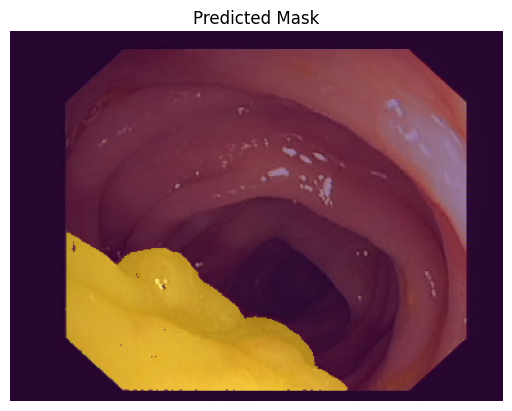

In [29]:
def yolo_sam(picture):
    img = cv2.imread(picture)
    yolo = YOLO('../yolo/models/yolo11n-trained-on-mixed-cli-col-ETIS.pt')
    results = yolo.predict(picture)
    boxes = results[0].boxes.xyxy[0].cpu().numpy()
    predictor.set_image(img)  
    masks, _, _ = predictor.predict(
        box = boxes,
        multimask_output=True,
    )
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.imshow(masks[0], alpha=0.5)
    plt.title("Predicted Mask")
    plt.axis('off')
    plt.show()
    return masks[0]

mask = yolo_sam("../clinicDB/images/1.png")

In [27]:
import numpy as np

def calculate_iou(mask, ground_truth):
    intersection = np.logical_and(mask, ground_truth).sum()
    union = np.logical_or(mask, ground_truth).sum()
    return intersection / union if union != 0 else 0

def calculate_dice(mask, ground_truth):
    intersection = np.logical_and(mask, ground_truth).sum()
    total = mask.sum() + ground_truth.sum()
    return 2 * intersection / total if total != 0 else 0

# 示例
# 假设 mask 和 ground_truth 是二值图像（0或1），可根据实际情况替换
mask = mask

ground_truth = cv2.imread('../clinicDB/Ground Truth/1.png', cv2.IMREAD_GRAYSCALE)
ground_truth = (ground_truth > 127).astype(np.uint8)

iou = calculate_iou(mask, ground_truth)
dice = calculate_dice(mask, ground_truth)
print("IoU:", iou)

IoU: 0.9336827846162907



image 1/1 /home/stellarlane/main/finetune/sam2/../clinicDB/images/1.png: 480x640 1 target, 21.7ms
Speed: 2.4ms preprocess, 21.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


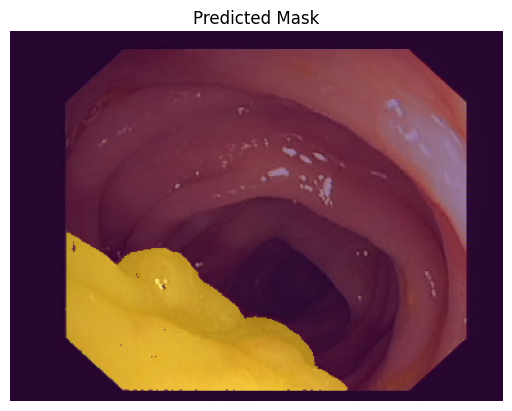


image 1/1 /home/stellarlane/main/finetune/sam2/../clinicDB/images/2.png: 480x640 1 target, 5.8ms
Speed: 1.0ms preprocess, 5.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


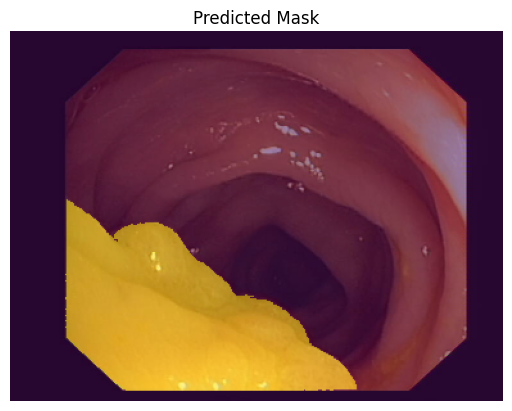


image 1/1 /home/stellarlane/main/finetune/sam2/../clinicDB/images/3.png: 480x640 1 target, 8.1ms
Speed: 1.2ms preprocess, 8.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


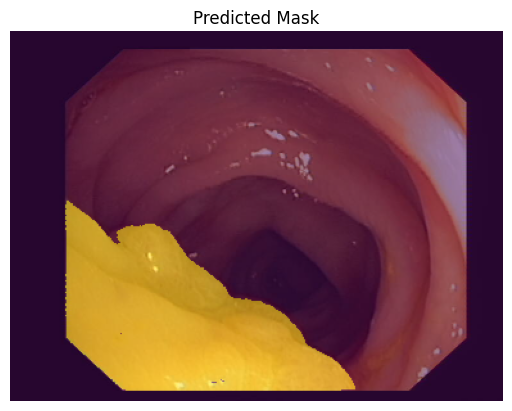


image 1/1 /home/stellarlane/main/finetune/sam2/../clinicDB/images/4.png: 480x640 1 target, 8.6ms
Speed: 1.1ms preprocess, 8.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


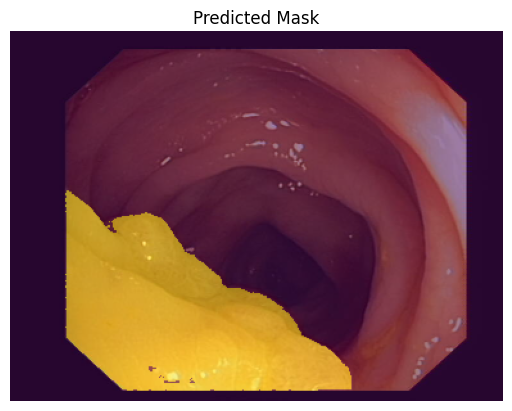


image 1/1 /home/stellarlane/main/finetune/sam2/../clinicDB/images/5.png: 480x640 1 target, 6.4ms
Speed: 1.1ms preprocess, 6.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


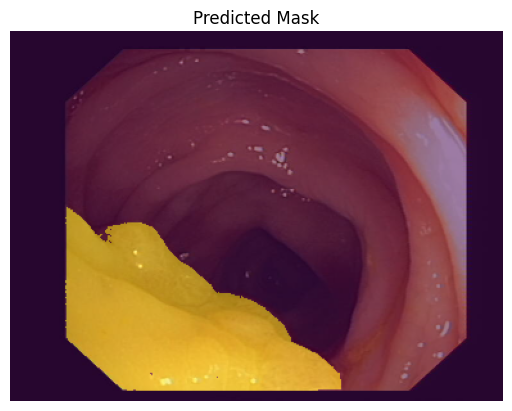


image 1/1 /home/stellarlane/main/finetune/sam2/../clinicDB/images/6.png: 480x640 1 target, 6.7ms
Speed: 1.0ms preprocess, 6.7ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


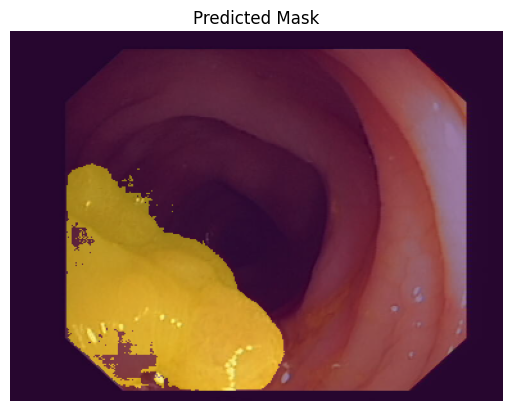


image 1/1 /home/stellarlane/main/finetune/sam2/../clinicDB/images/7.png: 480x640 1 target, 6.9ms
Speed: 1.0ms preprocess, 6.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


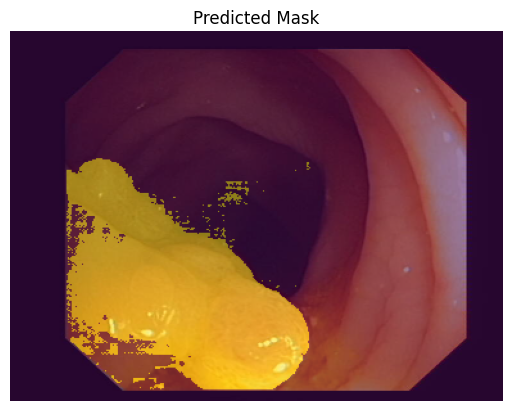


image 1/1 /home/stellarlane/main/finetune/sam2/../clinicDB/images/8.png: 480x640 1 target, 8.1ms
Speed: 1.0ms preprocess, 8.1ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


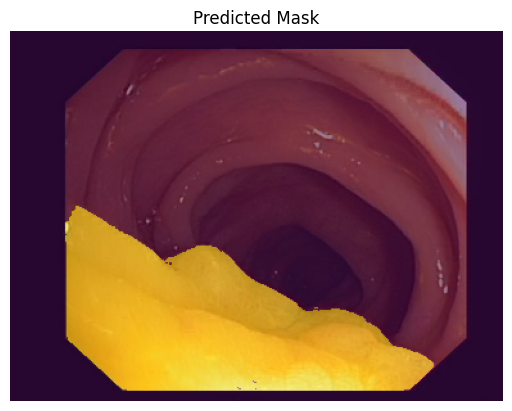


image 1/1 /home/stellarlane/main/finetune/sam2/../clinicDB/images/9.png: 480x640 1 target, 7.2ms
Speed: 1.1ms preprocess, 7.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


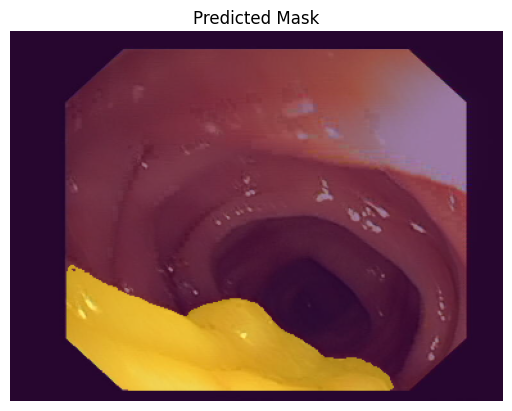

IoU: 0.9243200685147881
IoU_org: 0.00010137875101378751


In [38]:
IoU = []
IoU_org = []
IoU_gnd = []
for i in range(1, 10):
    mask = yolo_sam(f"../clinicDB/images/{i}.png")
    predictor.set_image(cv2.imread(f"../clinicDB/images/{i}.png"))
    mask_org, _, _ = predictor.predict()
    mask_org = mask_org[0]
    ground_truth = cv2.imread(f'../clinicDB/Ground Truth/{i}.png', cv2.IMREAD_GRAYSCALE)
    ground_truth = (ground_truth > 127).astype(np.uint8)
    iou = calculate_iou(mask, ground_truth)
    iou_org = calculate_iou(mask_org, ground_truth)
    IoU_org.append(iou_org)
    IoU.append(iou)
print("IoU:", sum(IoU) / len(IoU))
print("IoU_org:", sum(IoU_org) / len(IoU_org))